<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/cnn-mnist-digits/blob/master/ConvNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
dataset=pd.read_csv('sample_data/mnist_train_small.csv',header=None)
dataset_test=pd.read_csv('sample_data/mnist_test.csv',header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0




*   First column is the output
*   Other columns 784 Columns = 28 x 28 pixels 



In [0]:
X_train=dataset.iloc[:,1:].values.reshape(dataset.iloc[:,1:].shape[0],28,28,1)
Y_train=dataset.iloc[:,0].values

In [0]:
X_test=dataset_test.iloc[:,1:].values.reshape(dataset_test.iloc[:,1:].shape[0],28,28,1)
Y_test=dataset_test.iloc[:,0].values

In [7]:
X_train.shape

(20000, 28, 28, 1)

In [0]:
X_test.shape

(10000, 28, 28, 1)

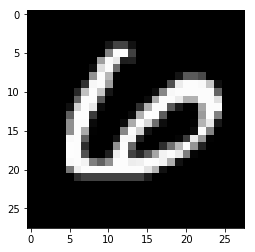

In [8]:
plt.gray()
plt.imshow(X_train[0].reshape(28,28))

In [0]:
img=np.array(X_train[0].reshape(28,28))

**AVERAGE POOLING**

(10, 10)


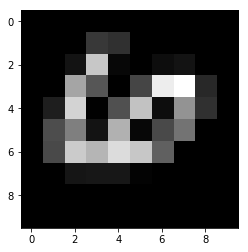

In [10]:
plt.gray()
pool_size=3

pool1=[]

for i in range(0,28,pool_size):
  r=[]
  for j in range(0,28,pool_size):
    val=0
    for p1 in range(pool_size):
      for p2 in range(pool_size):
        if(i+p1<28 and j+p2<28):
          val+=img[i+p1][j+p2]
    r.append(val/pool_size)
  pool1.append(r)
print(np.array(pool1).shape)
plt.imshow(pool1)

**MAX POOLING**

(10, 10)


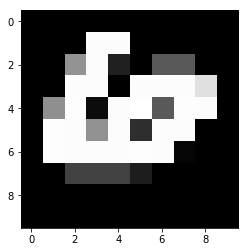

In [11]:
pool_size=3

pool2=[]

for i in range(0,28,pool_size):
  r=[]
  for j in range(0,28,pool_size):
    val=[]
    for p1 in range(pool_size):
      for p2 in range(pool_size):
        if(i+p1<28 and j+p2<28):
          val.append(img[i+p1][j+p2])
    r.append(max(val))
  pool2.append(r)
print(np.array(pool2).shape)
plt.imshow(pool2)

**OVERLAPPING MAX POOL**

(14, 14)


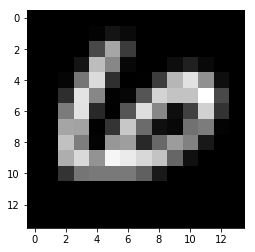

In [12]:
pool_size=3

pool3=[]

for i in range(0,28,2):
  r=[]
  for j in range(0,28,2):
    val=0
    for p1 in range(pool_size):
      for p2 in range(pool_size):
        if(i+p1<28 and j+p2<28):
          val+=img[i+p1][j+p2]
    r.append(val/pool_size)
  pool3.append(r)
print(np.array(pool3).shape)
plt.imshow(pool3)

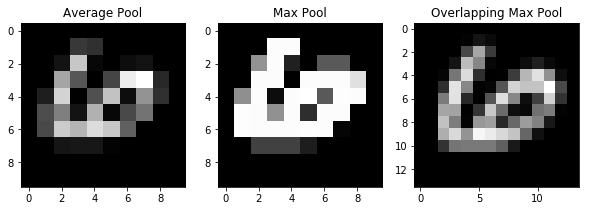

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,10))

ax1.set_title('Average Pool')
ax1.imshow(pool1)

ax2.set_title('Max Pool')
ax2.imshow(pool2)

ax3.set_title('Overlapping Max Pool')
ax3.imshow(pool3)
fig.show()

##CNN

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import to_categorical
from keras import optimizers
from keras.models import load_model

Using TensorFlow backend.


In [0]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [0]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
###LOAD MODEL
model = load_model('CNN-MNIST-digits.h5')

In [0]:
history=model.fit(X_train, Y_train, batch_size=25, nb_epoch=50, validation_split=0.2,verbose=1)

In [17]:
history=model.fit(X_train, Y_train, batch_size=25, nb_epoch=50, validation_split=0.2,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 16000 samples, validate on 4000 samples
Epoch 1/50
16000/16000 [==============================] - 7s 423us/step - loss: 12.7524 - acc: 0.2046 - val_loss: 7.1682 - val_acc: 0.5465
Epoch 2/50
16000/16000 [==============================] - 6s 396us/step - loss: 6.4669 - acc: 0.5893 - val_loss: 4.8940 - val_acc: 0.6868
Epoch 3/50
16000/16000 [==============================] - 6s 399us/step - loss: 3.6432 - acc: 0.7609 - val_loss: 2.3683 - val_acc: 0.8422
Epoch 4/50
16000/16000 [==============================] - 6s 399us/step - loss: 1.4464 - acc: 0.8560 - val_loss: 0.1889 - val_acc: 0.9480
Epoch 5/50
16000/16000 [==============================] - 6s 400us/step - loss: 0.2894 - acc: 0.9191 - val_loss: 0.1288 - val_acc: 0.9632
Epoch 6/50
16000/16000 [==============================] - 6s 400us/step - loss: 0.1942 - acc: 0.9440 - val_loss: 0.1065 - val_acc: 0.9685
Epoch 7/50
16000/16000 [==============================] - 6s 397us/step - loss: 0.1461 - acc: 0.9586 - val_loss: 0.0976 - 

In [0]:
model.save("CNN-MNIST-digits.h5")

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


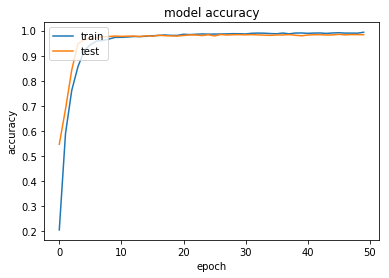

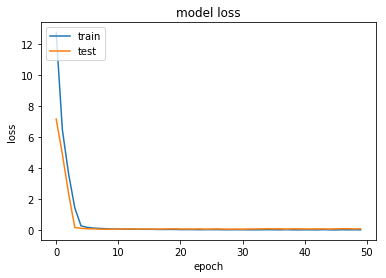

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##TESTING##

**MNIST TEST-SET**

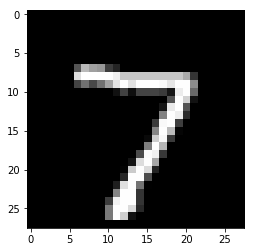

Prediction:  7


In [11]:
plt.imshow(X_test[0].reshape(28,28))
plt.show()
print("Prediction: ",np.argmax(model.predict(X_test[0].reshape(1,28,28,1))))

**CUSTOM NUMBER** ***Not part of MNIST***

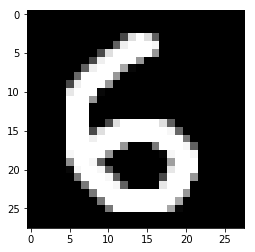

Prediction:  6


In [12]:
img=cv2.imread('6.png', cv2.IMREAD_GRAYSCALE).reshape(1,28,28,1)
plt.imshow(img[0].reshape(28,28))
plt.show()
print("Prediction: ",np.argmax(model.predict(img)))